# <center>💻 ANALYTICS CAPSTONE PROJECT (by Prof. Krystyn Gutu) 💻</center>
# <center>📈 Market Minder : Predictive Analytics for Enhanced Customer Insights 📊</center>
## <center> Spring 2024</center>
## <center>Submitted by: Mrunmay More</center>

#  Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

C:\ProgramData\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


# Importing Dataset
**The dataset is loaded into a pandas DataFrame df from a excel file named 'Online Retail.xlsx'.**

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# <center> 1.Explanatory Data Analysis </center>

# 1. Checking the shape of the dataset - 

**The shape attribute of a DataFrame returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.**

In [4]:
df.shape

(541909, 8)

# 2. Concise summary of the DataFrame
**The df.info() method provides a concise summary of the DataFrame. This includes information like the number of non-null entries in each column, the datatype of each column, and memory usage, among others. It is particularly useful to get a quick overview of the dataset, helping identify missing values and optimize data types for more efficient storage and computation.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# 3. Data Preprocessing

In [7]:
# Convert InvoiceDate from object to datetime for time series analysis
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.drop_duplicates(inplace=True)

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [9]:
# Count of unique values per category to understand the breadth of catalogue
print(df['StockCode'].nunique(), "unique stock codes")
print(df['Description'].nunique(), "unique product descriptions")
print(df['Country'].nunique(), "unique countries")

3665 unique stock codes
3877 unique product descriptions
37 unique countries


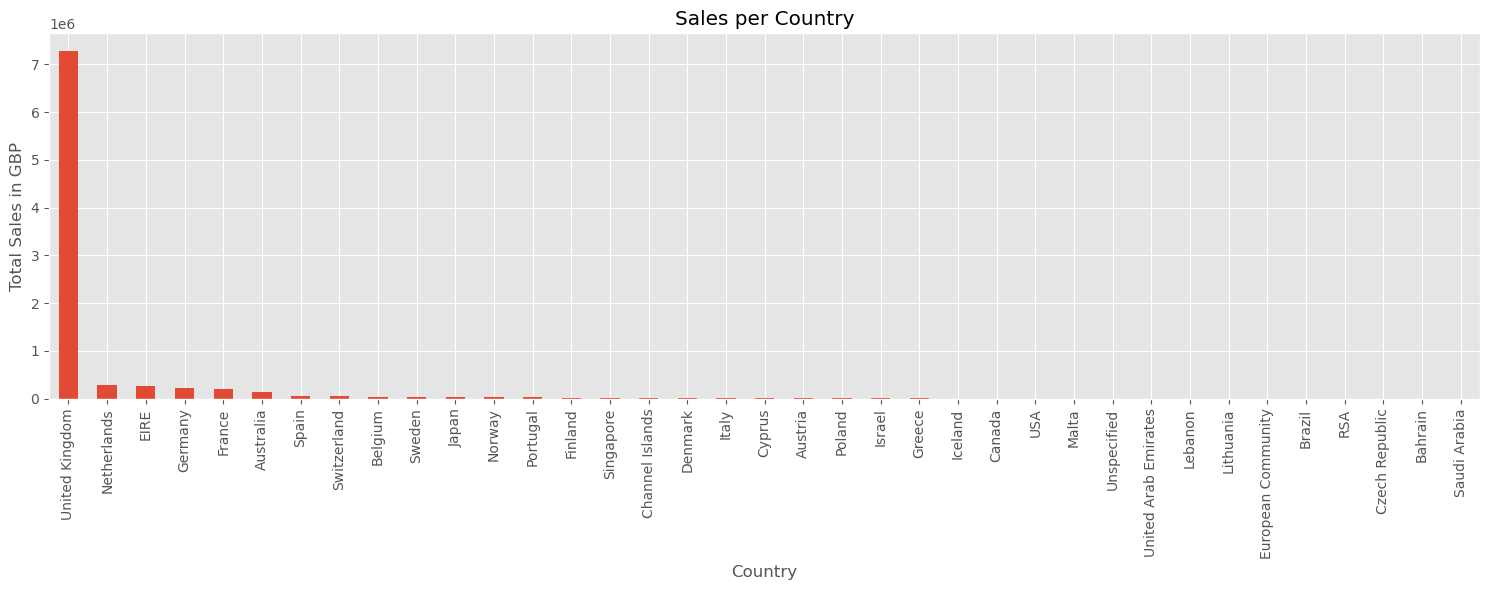

In [10]:
# Set a style for the plots
plt.style.use('ggplot')

# Sales per country
sales_per_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sales_per_country.plot(kind='bar')
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales in GBP')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding between and around subplots
plt.show()

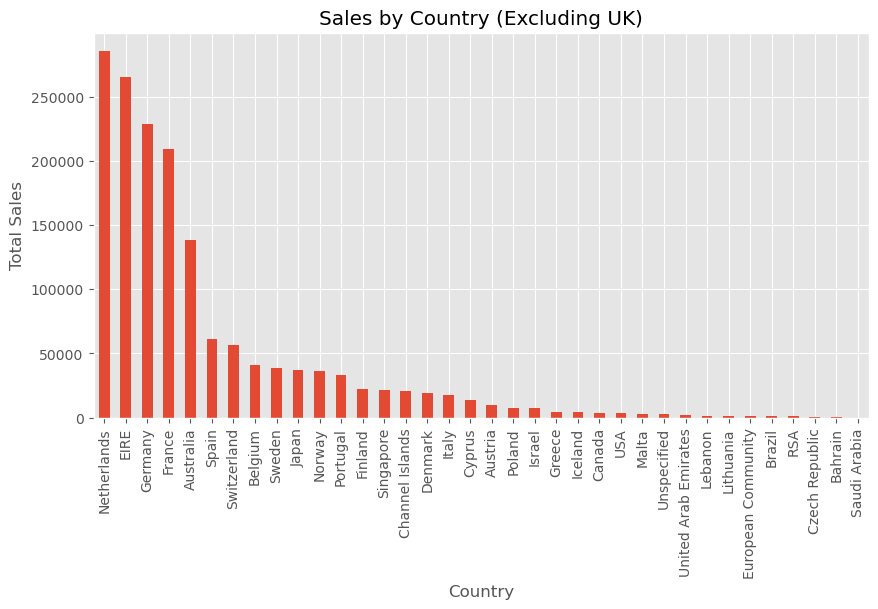

In [11]:
# Sales by country excluding UK
sales_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
sales_by_country.drop('United Kingdom').plot(kind='bar', figsize=(10,5), title='Sales by Country (Excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

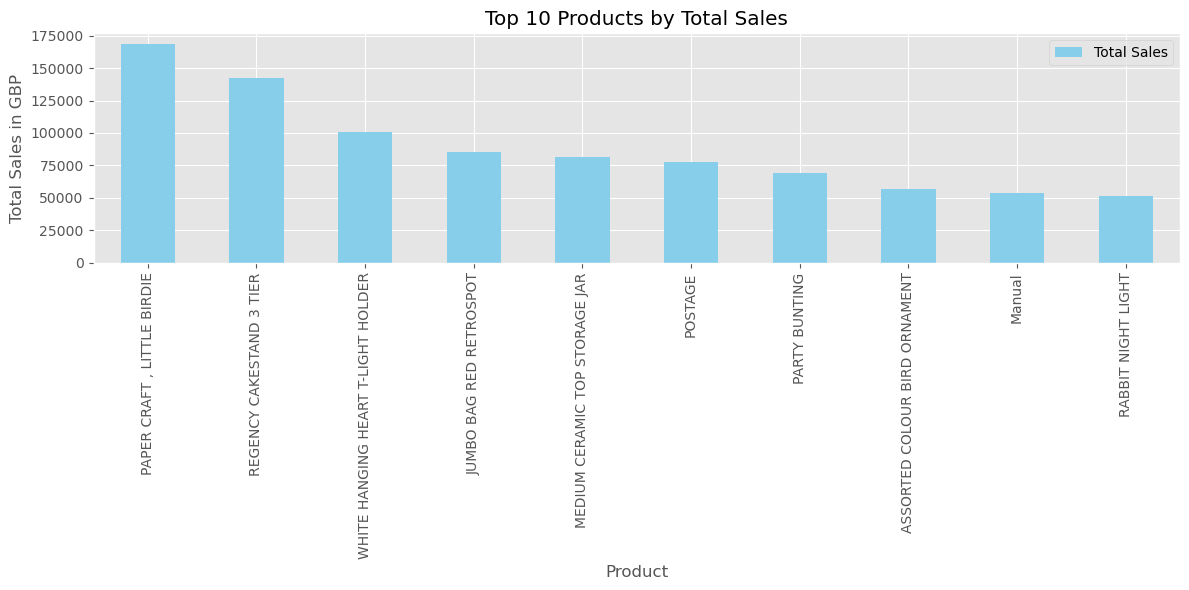

In [12]:
# Top 10 products by sales
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_products_bar = top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales in GBP')
top_products_bar.legend(["Total Sales"])
plt.tight_layout()
plt.show()

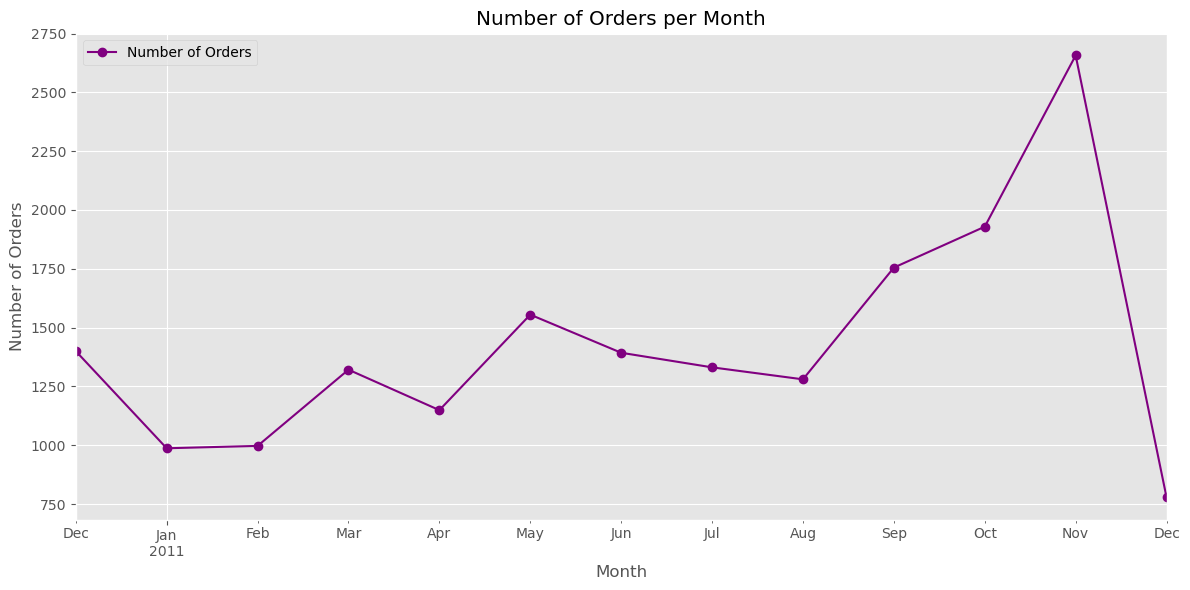

In [13]:
# Number of orders per month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
orders_per_month = df.groupby('YearMonth')['InvoiceNo'].nunique()
plt.figure(figsize=(12,6))
orders_per_month_line = orders_per_month.plot(kind='line', marker='o', color='purple')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
orders_per_month_line.legend(['Number of Orders'])
plt.grid(True)
plt.tight_layout()
plt.show()

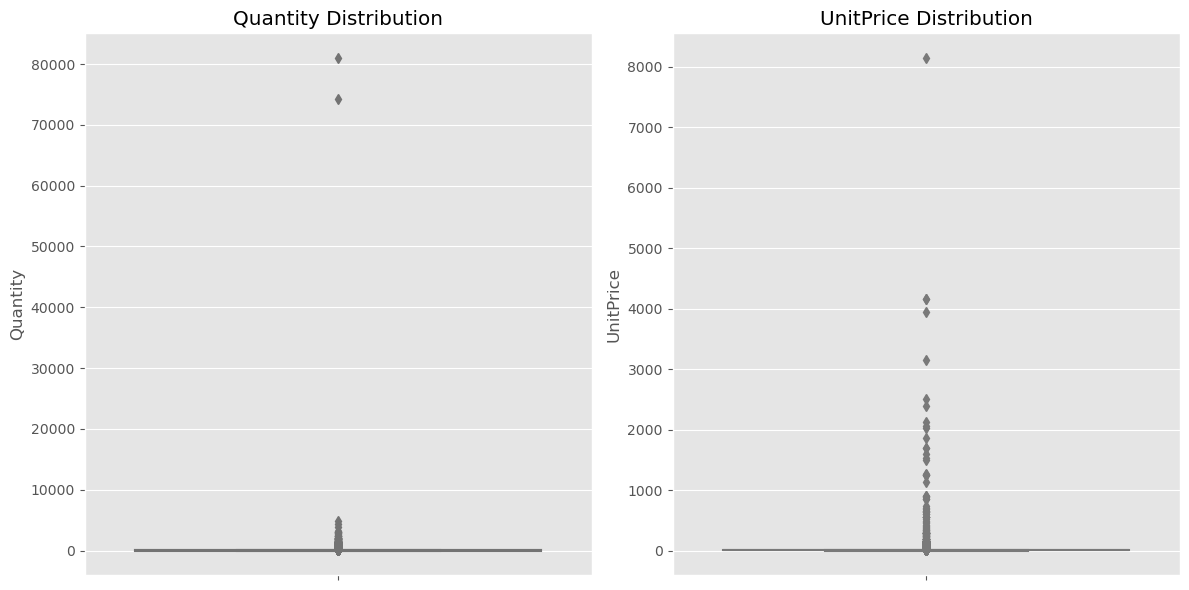

In [14]:
# Box plots of Quantity and UnitPrice to check for outliers
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['Quantity'], color='lightgreen').set_title('Quantity Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=df['UnitPrice'], color='lightblue').set_title('UnitPrice Distribution')

plt.tight_layout()
plt.show()

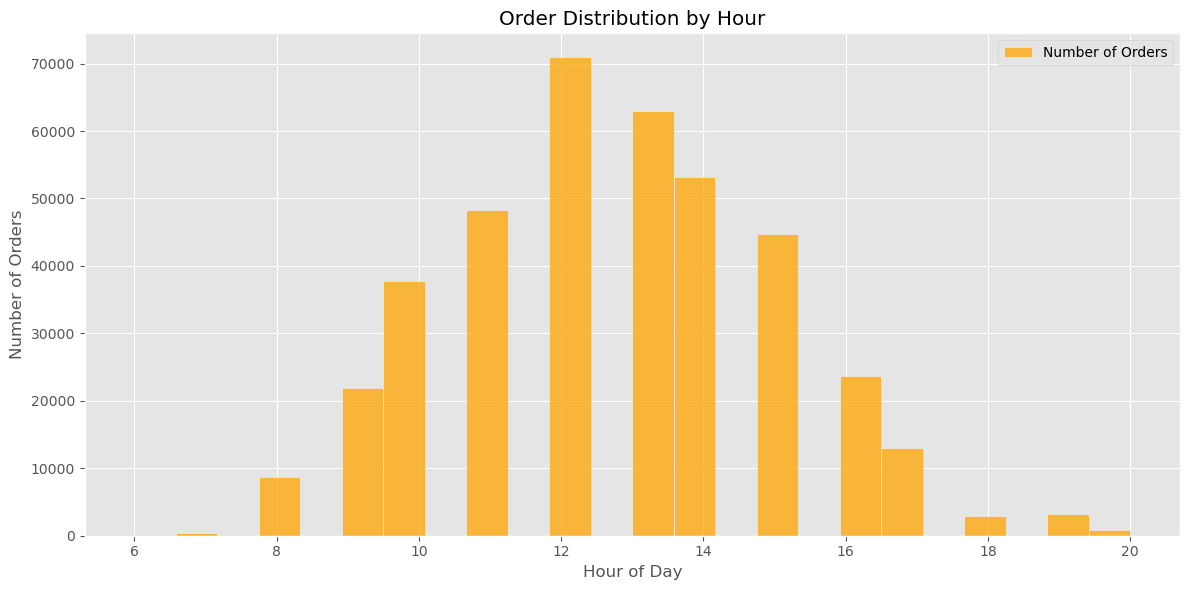

In [15]:
# Histogram of Hourly Sales
df['Hour'] = df['InvoiceDate'].dt.hour
plt.figure(figsize=(12,6))
hourly_dist = sns.histplot(df['Hour'], bins=24, kde=False, color='orange')
plt.title('Order Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
hourly_dist.legend(['Number of Orders'])
plt.tight_layout()
plt.show()

In [16]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8


# 4. Customer Segmentation with RFM Analysis

In [17]:
rfm_df = df.copy()
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])
snapshot_date = rfm_df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm_df = rfm_df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum',
}).reset_index()

rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'MonetaryValue'
}, inplace=True)

scaler = StandardScaler()
rfm_df_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'MonetaryValue']])

kmeans = KMeans(n_clusters=4, random_state=1)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df_scaled)

rfm_df['Segment'] = 'Low-Value'
rfm_df.loc[rfm_df['Cluster'] == 0, 'Segment'] = 'At-Risk'
rfm_df.loc[rfm_df['Cluster'] == 1, 'Segment'] = 'New'
rfm_df.loc[rfm_df['Cluster'] == 2, 'Segment'] = 'Engaged'
rfm_df.loc[rfm_df['Cluster'] == 3, 'Segment'] = 'Loyal'

rfm_df.to_csv('rfm_analysis_results.csv', index=False)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
print(rfm_df.head())

   CustomerID  Recency  Frequency  MonetaryValue  Cluster  Segment
0       12346      326          1       77183.60        0  At-Risk
1       12347        2          7        4310.00        1      New
2       12348       75          4        1797.24        1      New
3       12349       19          1        1757.55        1      New
4       12350      310          1         334.40        3    Loyal


In [19]:
rfm_df.to_csv('rfm_analysis_results.csv', index=False)

In [20]:
rfm_df

,CustomerID,Recency,Frequency,MonetaryValue,Cluster,Segment
0,12346,326,1,77183.60,0,At-Risk
1,12347,2,7,4310.00,1,New
2,12348,75,4,1797.24,1,New
3,12349,19,1,1757.55,1,New
4,12350,310,1,334.40,3,Loyal
...,...,...,...,...,...,...
4333,18280,278,1,180.60,3,Loyal
4334,18281,181,1,80.82,3,Loyal
4335,18282,8,2,178.05,1,New
4336,18283,4,16,2045.53,0,At-Risk


# 5.Product Analysis with ABC Analysis

In [21]:
# Create a new dataframe for product analysis
product_df = df.groupby('StockCode').agg({'InvoiceNo': 'nunique', 'Quantity': 'sum', 'TotalPrice': 'sum'}).reset_index()
product_df.rename(columns={'InvoiceNo': 'Orders', 'Quantity': 'TotalUnits', 'TotalPrice': 'TotalRevenue'}, inplace=True)

# Classify the products into A, B, and C categories based on revenue contribution
product_df = product_df.sort_values(by='TotalRevenue', ascending=False).reset_index(drop=True)
product_df['CumRevenue'] = product_df['TotalRevenue'].cumsum()
product_df['RevenuePercent'] = product_df['CumRevenue'] / product_df['TotalRevenue'].sum() * 100

# Assign ABC classes based on cumulative revenue percentage
product_df['ABC_Class'] = 'C'
product_df.loc[product_df['RevenuePercent'] <= 80, 'ABC_Class'] = 'B'
product_df.loc[product_df['RevenuePercent'] <= 50, 'ABC_Class'] = 'A'

# Print the ABC classification results
print(product_df.head())


  StockCode  Orders  TotalUnits  TotalRevenue  CumRevenue  RevenuePercent  \
0     23843       1       80995     168469.60   168469.60        1.895641   
1     22423    1703       12374     142264.75   310734.35        3.496422   
2    85123A    1978       36763     100547.45   411281.80        4.627795   
3    85099B    1600       46078      85040.54   496322.34        5.584682   
4     23166     195       77916      81416.73   577739.07        6.500793   

  ABC_Class  
0         A  
1         A  
2         A  
3         A  
4         A  


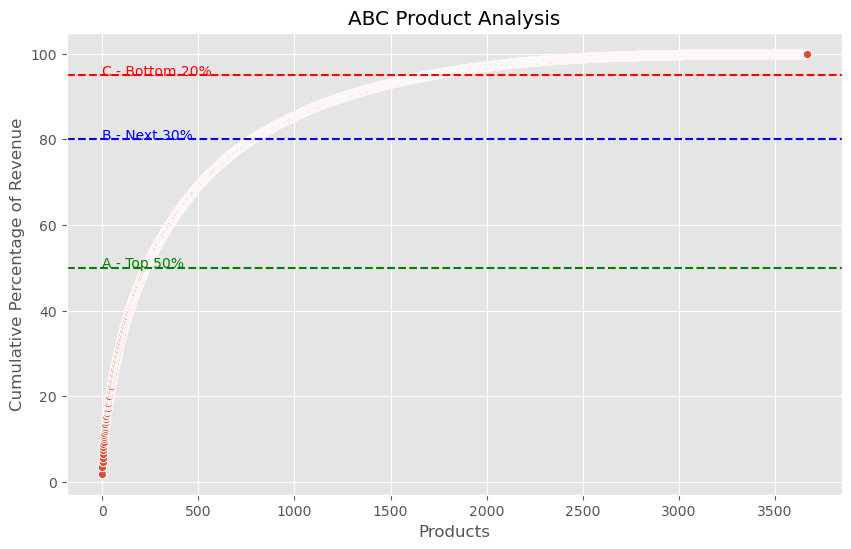

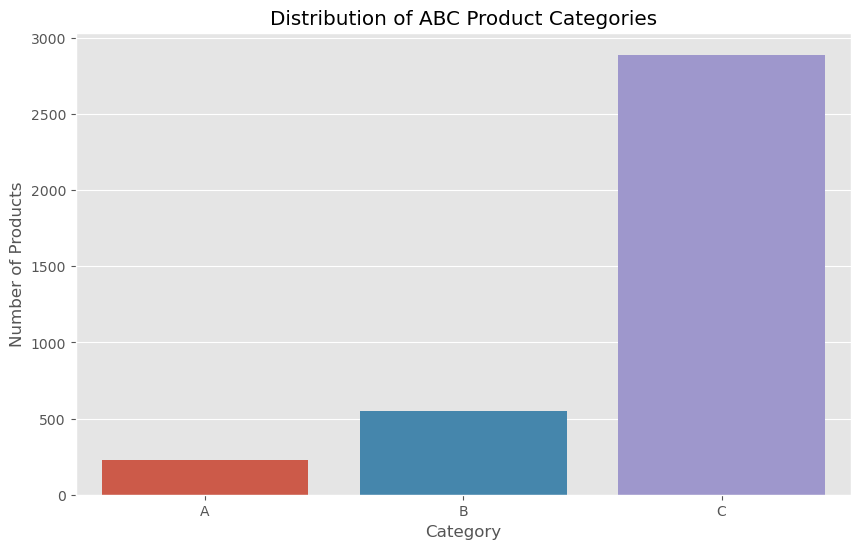

In [22]:
# Plot cumulative percentage to identify A, B, C categories visually
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(product_df)), y='RevenuePercent', data=product_df, marker='o')

# Add A, B, C classification lines
plt.axhline(y=50, color='green', linestyle='--')
plt.axhline(y=80, color='blue', linestyle='--')
plt.axhline(y=95, color='red', linestyle='--')

# Annotate the classification lines
plt.text(x=0, y=50, s='A - Top 50%', color='green')
plt.text(x=0, y=80, s='B - Next 30%', color='blue')
plt.text(x=0, y=95, s='C - Bottom 20%', color='red')

# Set titles and labels
plt.title('ABC Product Analysis')
plt.xlabel('Products')
plt.ylabel('Cumulative Percentage of Revenue')

# Visualize A, B, C category products
plt.figure(figsize=(10, 6))
sns.countplot(data=product_df, x='ABC_Class', order=['A', 'B', 'C'])
plt.title('Distribution of ABC Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')

plt.show()

# Market Basket Analysis (Association Rules)

In [23]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a basket format dataframe
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket_set = basket.applymap(lambda x: bool(x > 0))

# Apply the Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(basket_set, min_support=0.01, use_colnames=True, low_memory=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.head())

                          antecedents                         consequents  \
0  ( SET 2 TEA TOWELS I LOVE LONDON )                         (InvoiceNo)   
1                         (InvoiceNo)  ( SET 2 TEA TOWELS I LOVE LONDON )   
2            (10 COLOUR SPACEBOY PEN)                         (InvoiceNo)   
3                         (InvoiceNo)            (10 COLOUR SPACEBOY PEN)   
4   (12 MESSAGE CARDS WITH ENVELOPES)                         (InvoiceNo)   

   antecedent support  consequent support   support  confidence  lift  \
0            0.010360            1.000000  0.010360    1.000000   1.0   
1            1.000000            0.010360  0.010360    0.010360   1.0   
2            0.013058            1.000000  0.013058    1.000000   1.0   
3            1.000000            0.013058  0.013058    0.013058   1.0   
4            0.010091            1.000000  0.010091    1.000000   1.0   

   leverage  conviction  zhangs_metric  
0       0.0         inf            0.0  
1       0.0     

# Churn Prediction Model

# Churn Prediction

In [24]:
rfm_df['churn_label'] = rfm_df['Recency'] > 365
rfm_df['churn_label'] = rfm_df['churn_label'].astype(int)

features = rfm_df[['Recency', 'Frequency', 'MonetaryValue']]
labels = rfm_df['churn_label']

# Feature Selection and Preprocessing for Churn Prediction Model
feature_columns = [col for col in rfm_df.columns if col not in ('churn_label', 'Cluster', 'CustomerID', 'Segment')]

X = rfm_df[feature_columns]
y = rfm_df['churn_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster,Segment,churn_label
0,12346,326,1,77183.60,0,At-Risk,0
1,12347,2,7,4310.00,1,New,0
2,12348,75,4,1797.24,1,New,0
3,12349,19,1,1757.55,1,New,0
4,12350,310,1,334.40,3,Loyal,0


# Visualizations

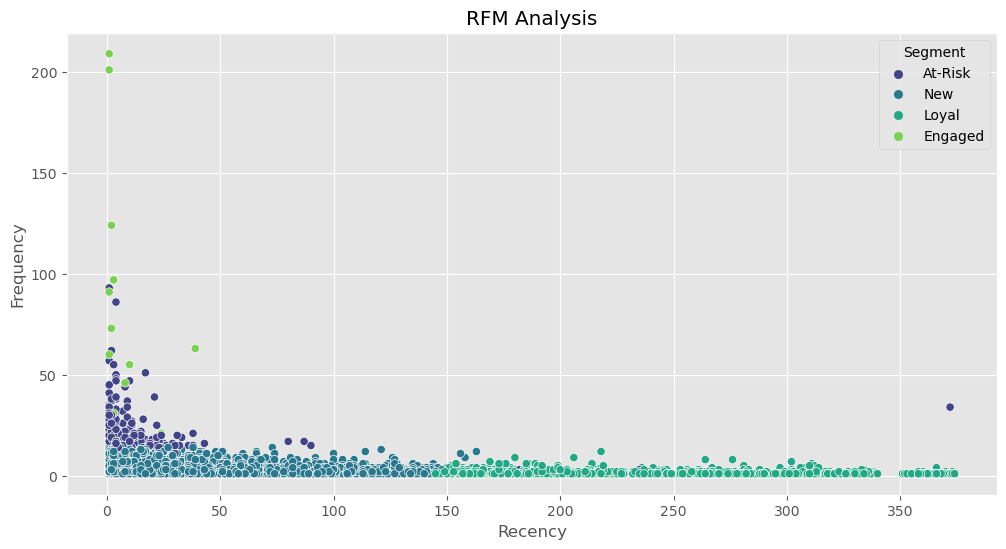

In [26]:
# Plot the RFM analysis results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Frequency', hue='Segment', palette='viridis')
plt.title('RFM Analysis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# Hyperparameter Tuning with GridSearchCV

In [27]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
rf_grid.fit(X_train_scaled, y_train)

print("Best Parameters: ", rf_grid.best_params_)

Best Parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


# K-Fold Cross-Validation

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models = [
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    LGBMClassifier(random_state=42)
]

def evaluate_model(model, X, y, n_splits=5):
    cv_scores = cross_val_score(model, X, y, cv=n_splits, scoring='roc_auc')
    print(f"{model.__class__.__name__} ROC AUC: {cv_scores.mean():.3f} +/- {cv_scores.std():.3f}")

print("K-Fold Cross-Validation Scores:")
evaluate_model(RandomForestClassifier(random_state=42), X_train_scaled, y_train)
evaluate_model(LogisticRegression(random_state=42), X_train_scaled, y_train)
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), X_train_scaled, y_train)
evaluate_model(LGBMClassifier(random_state=42), X_train_scaled, y_train)

K-Fold Cross-Validation Scores:
RandomForestClassifier ROC AUC: 1.000 +/- 0.000
LogisticRegression ROC AUC: 1.000 +/- 0.001
XGBClassifier ROC AUC: 1.000 +/- 0.000
[LightGBM] [Info] Number of positive: 45, number of negative: 2731
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 2776, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016210 -> initscore=-4.105761
[LightGBM] [Info] Start training from score -4.105761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

# Train Final Models

In [29]:
rf_model = RandomForestClassifier(**rf_grid.best_params_)
rf_model.fit(X_train_scaled, y_train)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 56, number of negative: 3414
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 3470, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016138 -> initscore=-4.110288
[LightGBM] [Info] Start training from score -4.110288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(random_state=42)

# Evaluate Models on Test Set

In [30]:
def evaluate_model(name, model, features, labels):
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    roc_auc = roc_auc_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    precision = precision_score(labels, predictions)
    recall = recall_score(labels, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(confusion_matrix(labels, predictions))
    print("\n")

print("Test Set Evaluation:")
evaluate_model("Random Forest", rf_model, X_test_scaled, y_test)
evaluate_model("Logistic Regression", logreg_model, X_test_scaled, y_test)
evaluate_model("XGBoost", xgb_model, X_test_scaled, y_test)
evaluate_model("LightGBM", lgbm_model, X_test_scaled, y_test)

Test Set Evaluation:
Model: Random Forest
Accuracy: 1.00
ROC AUC: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
[[855   0]
 [  0  13]]


Model: Logistic Regression
Accuracy: 1.00
ROC AUC: 0.96
F1 Score: 0.96
Precision: 1.00
Recall: 0.92
[[855   0]
 [  1  12]]


Model: XGBoost
Accuracy: 1.00
ROC AUC: 0.92
F1 Score: 0.92
Precision: 1.00
Recall: 0.85
[[855   0]
 [  2  11]]


Model: LightGBM
Accuracy: 1.00
ROC AUC: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00
[[855   0]
 [  0  13]]


